# Data Science Project: Stack Overflow Survey Analysis

## 1. Business Understanding
Every year, Stack Overflow conducts a massive survey of people on the site, covering all sorts of information like programming languages, salary, code style and various other information. This year, they amassed more than 64,000 responses fielded from 213 countries.
### Questions:
1. How does the highest level of formal education (Bachelor's, Master's, etc.) correlate with employment status in the tech industry?
2. What is the relationship between the frequency of remote work and company size (number of employees)?
3. What are the programming hobby trends across different countries and how do they correlate with employment in the tech industry?
4. How does the employment status (full-time vs. freelance) vary by the field of study in university (e.g., Computer Science vs. Other fields)?
5. What are the salary distributions across different company sizes and education levels?

## 2. Data Understanding
The dataset contains responses from over 64,000 participants across 213 countries. Key columns include:

- Respondent: Unique ID for each participant.
- ProgramHobby: Whether programming is a hobby.
- Country: Country of the respondent.
- University: Whether the respondent attended university.
- EmploymentStatus: The current employment status (e.g., full-time, part-time, freelance, etc.).
- FormalEducation: The highest level of formal education attained.
- MajorUndergrad: The field of study in university (e.g., Computer Science, Engineering, etc.).
- HomeRemote: Frequency of remote work.
- CompanySize: Size of the company (e.g., 1-10 employees, 100-200 employees, etc.).
- Salary: The respondent's salary (if applicable).

### Load Libraries and Data

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
df = pd.read_csv('./data/survey_results_public.csv')
df_schema = pd.read_csv('./data/survey_results_schema.csv')

# Check the first few rows
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Handle Missing Data
For this analysis, missing data in certain columns, such as FormalEducation and EmploymentStatus, were filled using the mode (most frequent value) for the following reasons:

The missing data represents a small fraction of the dataset, so filling them with the mode avoids significant distortion of the data.
Using the mode is a reasonable approach since these columns represent categorical data where the most common category is likely to be representative.
Imputing the mode helps maintain the integrity of the dataset without introducing large biases.

In [6]:
# Check missing values
df.isnull().sum()

# Handle missing values: Fill missing 'FormalEducation' with the mode
df['FormalEducation'].fillna(df['FormalEducation'].mode()[0], inplace=True)
df['EmploymentStatus'].fillna(df['EmploymentStatus'].mode()[0], inplace=True)


### Convert Categorical Variables

In [7]:
# Convert categorical variables to categories for efficient processing
df['Country'] = df['Country'].astype('category')
df['ProgramHobby'] = df['ProgramHobby'].astype('category')
df['EmploymentStatus'] = df['EmploymentStatus'].astype('category')
df['FormalEducation'] = df['FormalEducation'].astype('category')
df['CompanySize'] = df['CompanySize'].astype('category')


### Salary Ranges

In [8]:
# Group salary into ranges: Low, Medium, High, Very High
df['SalaryRange'] = pd.cut(df['Salary'], bins=[0, 25000, 50000, 75000, 100000], labels=['Low', 'Medium', 'High', 'Very High'])


## 3. Data Analysis & Visualization

### Question 1: Employment Status by Education Level
Question: How does the highest level of formal education correlate with employment status in the tech industry?
Method: Group data by FormalEducation and EmploymentStatus and visualize using a stacked bar chart.

We examined how formal education correlates with employment status in the tech industry by grouping the data based on FormalEducation and EmploymentStatus. A stacked bar chart was used for visualization, where each bar represents a different education level, and the segments show the distribution of employment status within each education level.

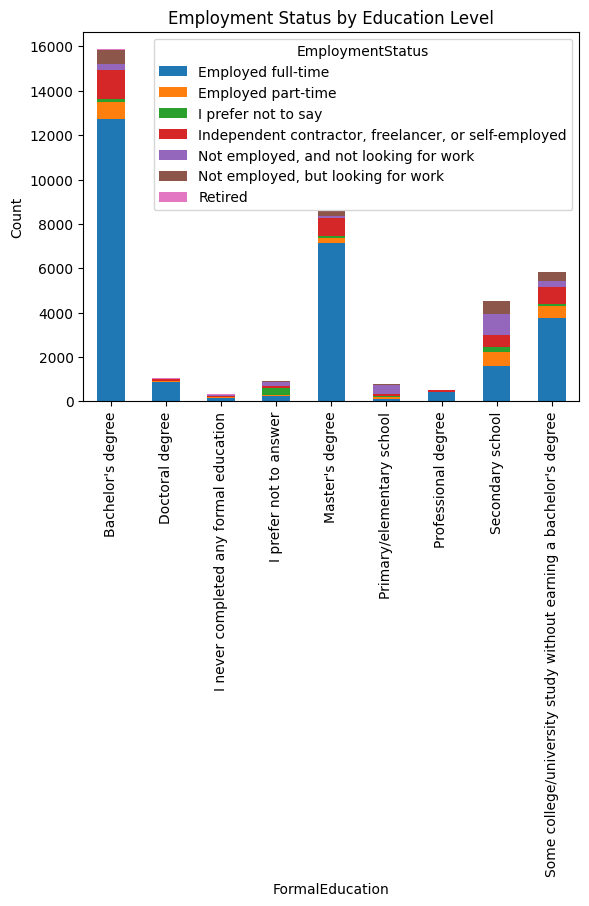

In [9]:
# Groupby with observed=False to avoid the FutureWarning
education_employment = df.groupby('FormalEducation', observed=False)['EmploymentStatus'].value_counts().unstack()

# Visualization: Barplot for employment status vs education level
education_employment.plot(kind='bar', stacked=True)
plt.title('Employment Status by Education Level')
plt.ylabel('Count')
plt.show()


### Question 2: Remote Work Frequency by Company Size
Question: What is the relationship between the frequency of remote work and company size (number of employees)?
Method: Use a boxplot to visualize remote work frequency for different company sizes.

Next, we analyzed the relationship between remote work and company size. A boxplot was used to show how the frequency of remote work varies by company size category (Small, Medium, Large). The CompanySize column was categorized into these groups for better interpretation.

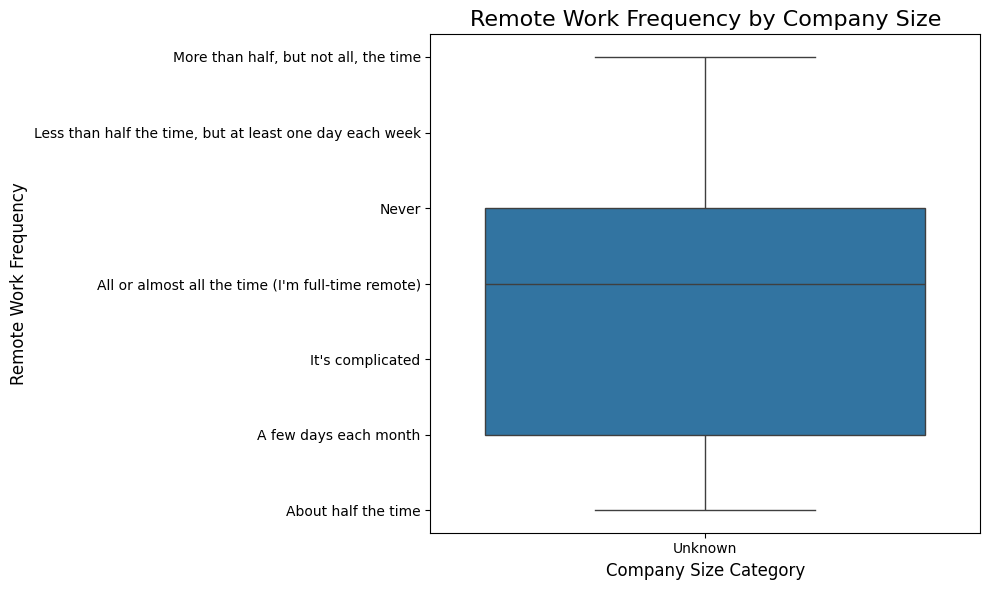

In [10]:
# Function to categorize company size
def categorize_company_size(size):
    """
    Categorizes company size based on the number of employees.
    
    Parameters:
    size (str): The size of the company as a string or numeric value.
    
    Returns:
    str: A category of company size ('Small', 'Medium', 'Large', or 'Unknown').
    """
    try:
        size = int(size)
        if size <= 50:
            return 'Small'
        elif size <= 200:
            return 'Medium'
        else:
            return 'Large'
    except ValueError:
        return 'Unknown'  # Handle any invalid or missing data

# Apply categorization to the 'CompanySize' column
df['CompanySizeCategory'] = df['CompanySize'].apply(categorize_company_size)

# Set figure size
plt.figure(figsize=(10, 6))

# Create a boxplot showing remote work frequency by company size category
sns.boxplot(x='CompanySizeCategory', y='HomeRemote', data=df)

# Title and labels
plt.title('Remote Work Frequency by Company Size', fontsize=16)
plt.xlabel('Company Size Category', fontsize=12)
plt.ylabel('Remote Work Frequency', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

### Question 3: Programming Hobby Trends by Country and Employment Status
Question: What are the programming hobby trends across different countries and how do they correlate with employment in the tech industry?

Method: Use a bar chart to show programming hobby trends by country and employment status.

We explored programming hobby trends across countries and their correlation with employment status. A bar plot was created to visualize the number of people who have programming as a hobby across different countries and how this trend correlates with employment status.

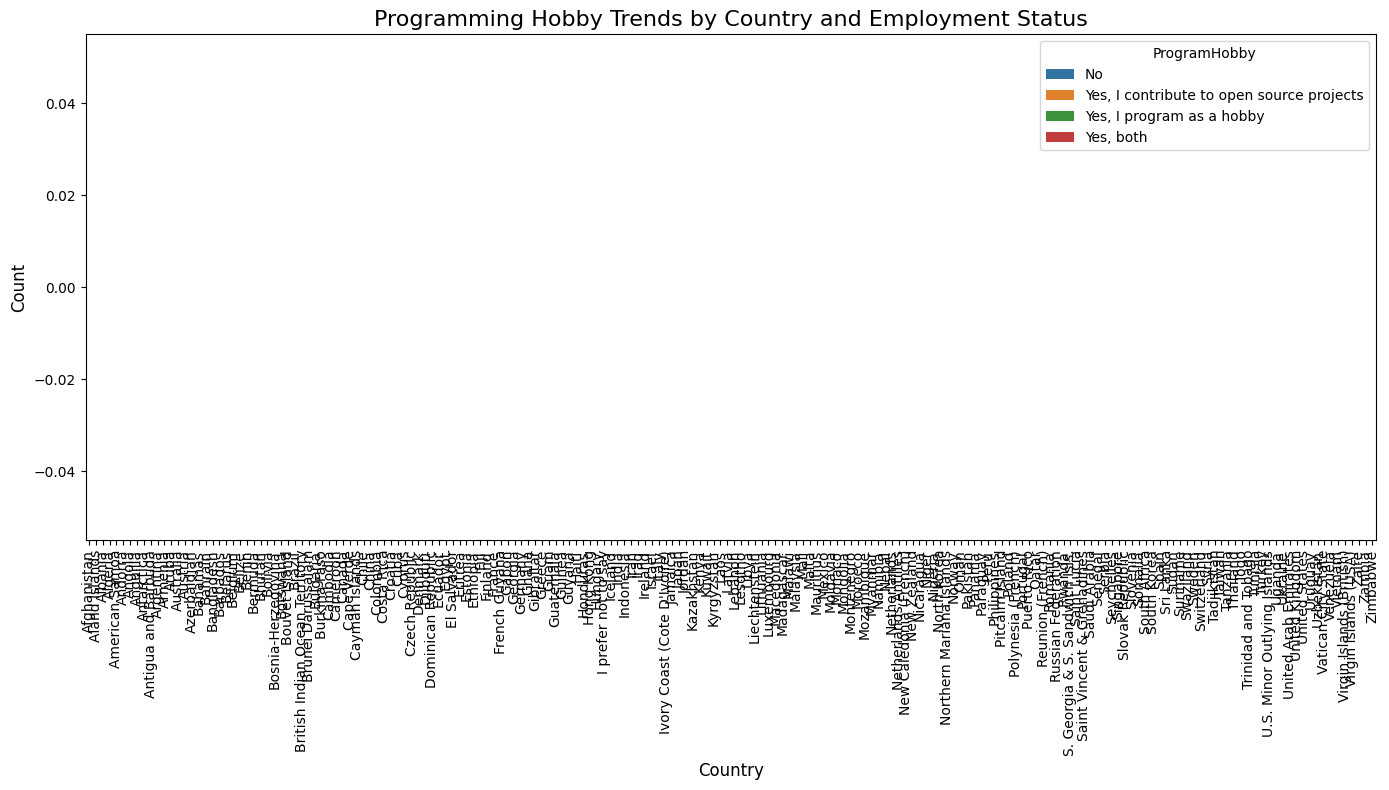

In [11]:
# Group the data by Country, ProgramHobby, and EmploymentStatus with observed=False
hobby_programming_country = df.groupby(['Country', 'ProgramHobby', 'EmploymentStatus'], observed=False).size().unstack(fill_value=0)

# Reset the index to make 'Country' a column
hobby_programming_country = hobby_programming_country.reset_index()

# Set figure size
plt.figure(figsize=(14, 8))

# Create a bar plot showing programming hobby trends by country and employment status
sns.barplot(x='Country', y=0, hue='ProgramHobby', data=hobby_programming_country)

# Title and labels
plt.title('Programming Hobby Trends by Country and Employment Status', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)  # Rotate country names for readability

# Show the plot
plt.tight_layout()
plt.show()


### Question 4: Employment Status by Major in University
Question: How does employment status vary by field of study in university (e.g., Computer Science vs Other fields)?

Method: Group by MajorUndergrad and EmploymentStatus and visualize with a bar plot.

For employment status based on field of study, a bar chart was used to show how students from different university majors (e.g., Computer Science vs other fields) fare in the tech industry.


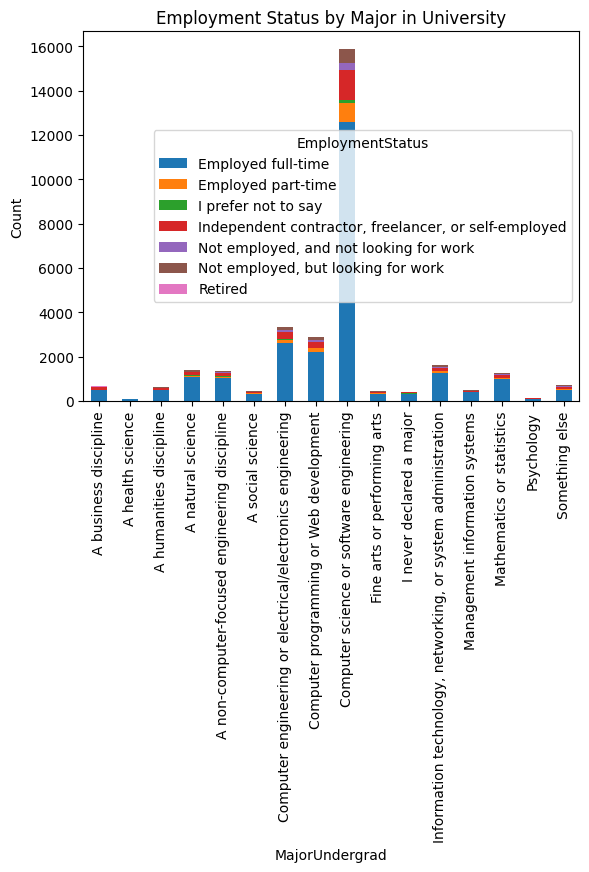

In [12]:
# Analyze employment status by major in university
major_employment = df.groupby('MajorUndergrad')['EmploymentStatus'].value_counts().unstack()

# Visualization: Bar plot for employment status vs major in university
major_employment.plot(kind='bar', stacked=True)
plt.title('Employment Status by Major in University')
plt.ylabel('Count')
plt.show()


### Question 5: Salary Distribution by Company Size and Education Level
Question: What are the salary distributions across different company sizes and education levels?

Method: Use a boxplot to visualize salary distribution based on company size and education 
level.

Finally, salary distribution was examined across different company sizes and education levels. A boxplot was created to visualize the relationship between these factors.

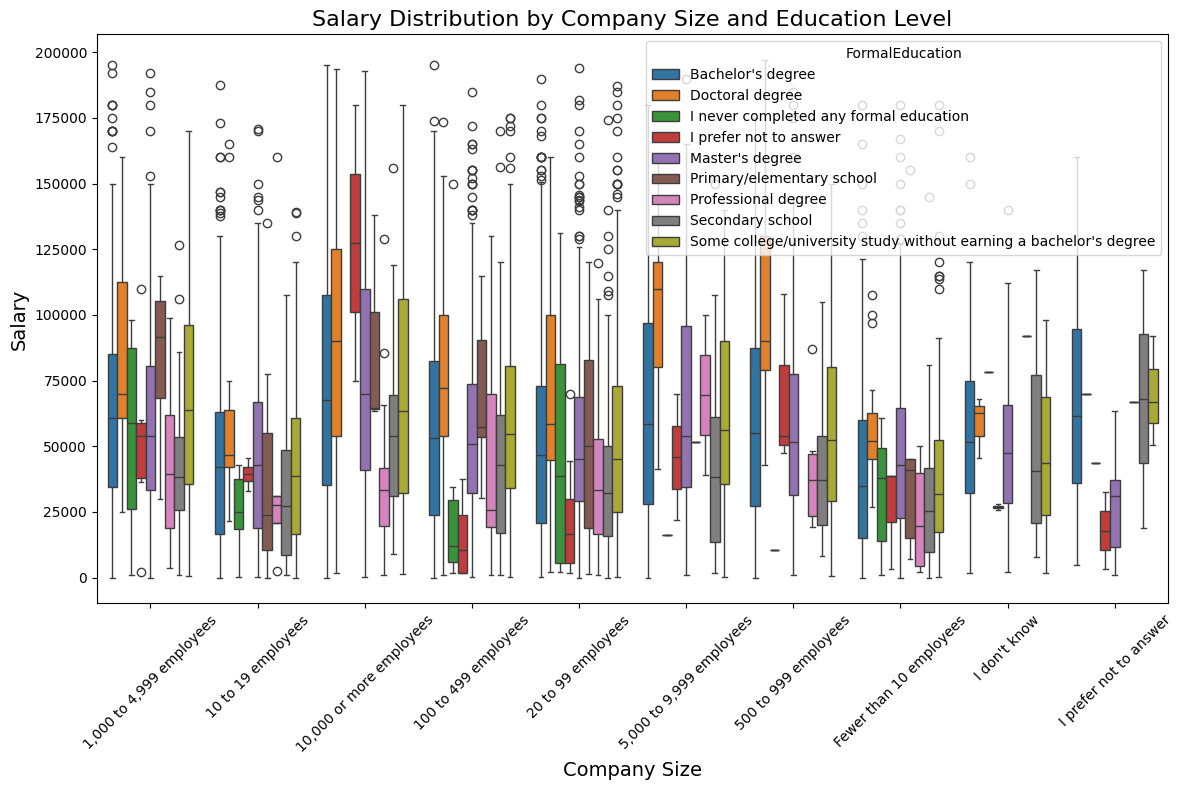

In [13]:
# Increase the size of the plot
plt.figure(figsize=(12, 8))

# Boxplot for salary distribution by company size and education level
sns.boxplot(x='CompanySize', y='Salary', hue='FormalEducation', data=df)

# Rotate x-axis labels for better readability (if necessary)
plt.xticks(rotation=45)

# Add title and labels
plt.title('Salary Distribution by Company Size and Education Level', fontsize=16)
plt.xlabel('Company Size', fontsize=14)
plt.ylabel('Salary', fontsize=14)

# Show the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


## 4. Conclusion
### Insights from Analysis
- Employment Status & Education: Higher education levels tend to correlate with full-time employment in the tech industry, particularly in technical fields like Computer Science.
- Remote Work & Company Size: Smaller companies appear to offer more flexible remote work opportunities compared to larger companies.
- Programming Hobby Trends: There are clear trends in the prevalence of programming as a hobby across different countries, which often correlates with employment in the tech industry.
- Employment Status & Major: Students and graduates in Computer Science and related fields are more likely to be employed full-time in tech roles.
- Salary & Company Size: Larger companies generally pay higher salaries, especially for employees with higher education levels.